In [1]:
from hydipy import Discrete, Continuous, DynamicDiscretization
from hydipy.Distributions import NormalDistribution, ExponentialDistribution

ModuleNotFoundError: No module named 'hydipy'

# Basic Examples

This notebook shows hybrid BN examples of 1) continuous nodes with discrete parents, 2) continuous nodes with continuous parents 3) deterministic functions with continuous parents

## Mixture Distribution



$$
\begin{align*} 
p(x) &= \begin{cases} 0.7 & \text{if} \quad x = a \\
0.3 & \text{if} \quad x= b \end{cases}\\
y &\sim \begin{cases} \text{Normal}(5,1) & \text{if} \quad x = a \\
\text{Normal}(1,3) & \text{if} \quad x= b
\end{cases}

\end{align*}
$$

In [ ]:
x = Discrete.DiscreteNode(
    id="x", 
    values=[[0.7],[0.3]],
    parents=[],
    states=['a','b'])
y = Continuous.MixtureNode(
    id="y", 
    values=[[NormalDistribution(5,1)],[NormalDistribution(1,3)]],
    parents=['x'])

In [ ]:
hbn = DynamicDiscretization.Hybrid_BN([x,y])
dd = DynamicDiscretization.DynamicDiscretization(hbn)


***** Variable: y ******

Mean: 5.004, Std. Dev: 1.026
Percentile (5.0% — 95.0%) = (3.346 — 6.760)


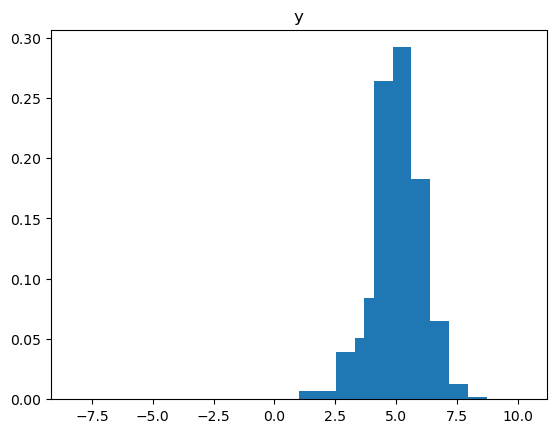

In [ ]:
post = dd.query(['y'], evidence={'x':'a'}, show_stats=True, show_figures=True)

***** Variable: x ******

+------+----------+
| x    |   phi(x) |
+======+==========+
| x(a) |   0.5416 |
+------+----------+
| x(b) |   0.4584 |
+------+----------+


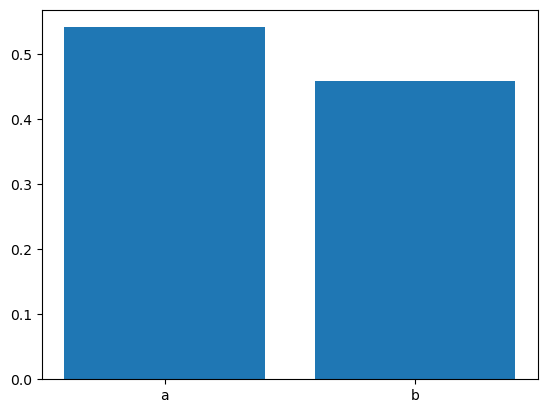

In [ ]:
post = dd.query(['x'], evidence={'y':'3'}, show_stats=True, show_figures=True)

## Continuous Nodes

$$
\begin{align*} 
\mu &\sim \text{Normal}(5,1) \\
\sigma &\sim \text{Exponential}(1) \\
x_i &\sim \text{Normal}(\mu, \sigma) 

\end{align*}
$$

In [ ]:
mu = Continuous.ContinuousNode(id='mu', dist=NormalDistribution(5.0,1.0))
sigma = Continuous.ContinuousNode(id='sigma', dist=ExponentialDistribution(1.0))

data = {'x_1':6.1, 'x_2':6.5, 'x_3':8.0, 'x_4':5.1, 'x_5':7.9, 'x_6':7.7}
observed_nodes = []

for obs_id in data.keys():
    obs_node = Continuous.ContinuousNode(id = obs_id, dist=NormalDistribution("mu", "sigma"), parents=["mu", "sigma"])
    observed_nodes.append(obs_node)

all_nodes = [mu, sigma] + observed_nodes
hbn = DynamicDiscretization.Hybrid_BN(all_nodes)
dd = DynamicDiscretization.DynamicDiscretization(hbn)


***** Variable: mu ******

Mean: 6.444, Std. Dev: 0.524
Percentile (5.0% — 95.0%) = (5.519 — 7.219)
***** Variable: sigma ******

Mean: 1.351, Std. Dev: 0.474
Percentile (5.0% — 95.0%) = (0.791 — 2.243)


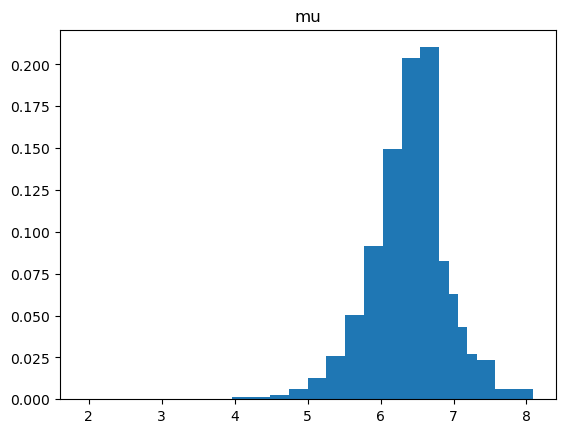

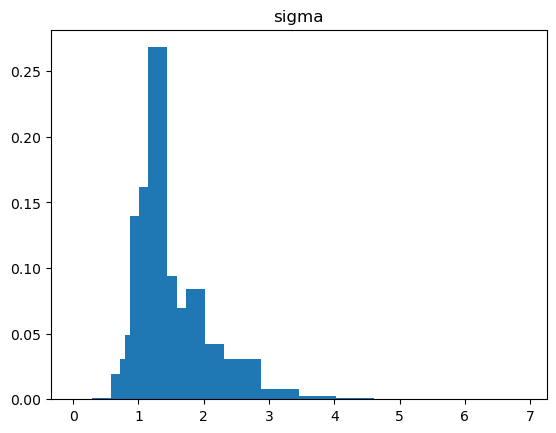

In [ ]:
post = dd.query(['mu','sigma'], evidence=data, n_iter=15, show_stats=True, show_figures=True)

## Deterministic Nodes


$$
\begin{align*} 
x &\sim \text{Normal}(5,1) \\
y &\sim \text{Normal}(1,2) \\
z &= 2x + y 

\end{align*}
$$

In [ ]:
def f(x,y):
    return 2*x + y

In [ ]:
x = Continuous.ContinuousNode(id='x', dist=NormalDistribution(5,1))
y = Continuous.ContinuousNode(id='y', dist=NormalDistribution(1,2))
z = Continuous.Deterministic(id='z',expression=f, parents=['x','y'])

In [ ]:
hbn = DynamicDiscretization.Hybrid_BN([x,y,z])

***** Variable: x ******

Mean: 4.355, Std. Dev: 0.704
Percentile (5.0% — 95.0%) = (3.148 — 5.455)


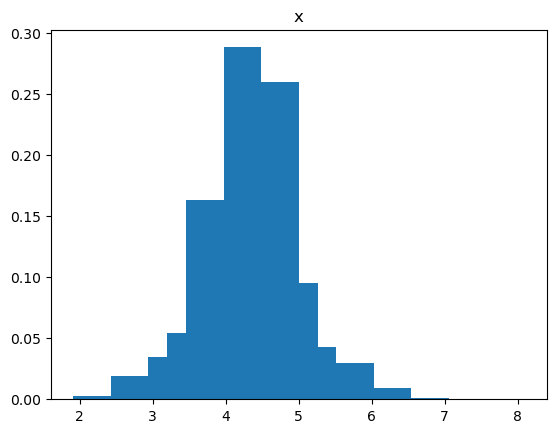

In [ ]:
dd = DynamicDiscretization.DynamicDiscretization(hbn)
post = dd.query(['x'], evidence={'z':8},show_figures=True, show_stats=True)

***** Variable: x ******

Mean: 4.998, Std. Dev: 0.998
Percentile (5.0% — 95.0%) = (3.327 — 6.673)
***** Variable: y ******

Mean: 0.996, Std. Dev: 1.997
Percentile (5.0% — 95.0%) = (-2.345 — 4.345)
***** Variable: z ******

Mean: 10.979, Std. Dev: 2.889
Percentile (5.0% — 95.0%) = (6.216 — 15.766)


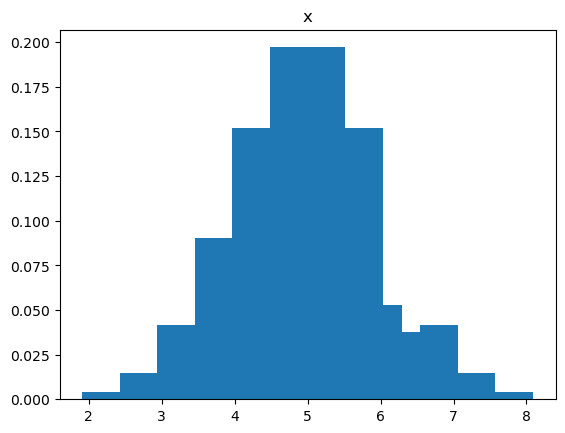

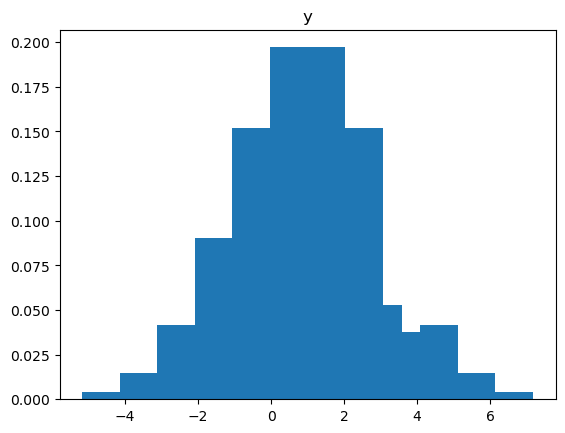

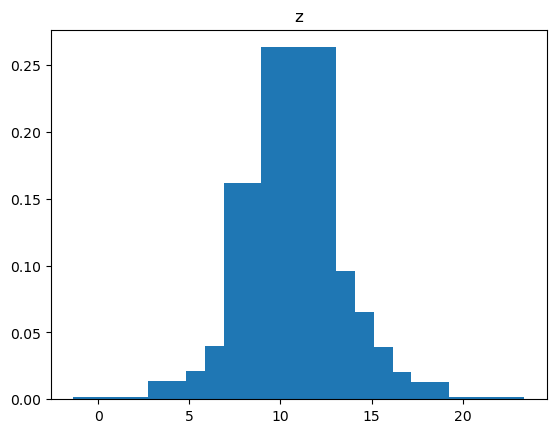

In [ ]:
dd = DynamicDiscretization.DynamicDiscretization(hbn)
post = dd.query(['x','y','z'], evidence={},show_figures=True, show_stats=True)